<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Closure" data-toc-modified-id="Closure-1">Closure</a></span><ul class="toc-item"><li><span><a href="#First-Class-Object" data-toc-modified-id="First-Class-Object-1.1">First Class Object</a></span></li><li><span><a href="#기본-예제" data-toc-modified-id="기본-예제-1.2">기본 예제</a></span><ul class="toc-item"><li><span><a href="#내부-함수에서-외부-변수에-액세스" data-toc-modified-id="내부-함수에서-외부-변수에-액세스-1.2.1">내부 함수에서 외부 변수에 액세스</a></span></li></ul></li><li><span><a href="#Fibonacci" data-toc-modified-id="Fibonacci-1.3">Fibonacci</a></span><ul class="toc-item"><li><span><a href="#재귀함수와-비교" data-toc-modified-id="재귀함수와-비교-1.3.1">재귀함수와 비교</a></span></li></ul></li><li><span><a href="#Grade-classifier" data-toc-modified-id="Grade-classifier-1.4">Grade classifier</a></span></li><li><span><a href="#Cache와-Decorator" data-toc-modified-id="Cache와-Decorator-1.5">Cache와 Decorator</a></span><ul class="toc-item"><li><span><a href="#스코프" data-toc-modified-id="스코프-1.5.1">스코프</a></span></li></ul></li><li><span><a href="#여러-함수의-Cache" data-toc-modified-id="여러-함수의-Cache-1.6">여러 함수의 Cache</a></span><ul class="toc-item"><li><span><a href="#__-closure-__,-cell_contents" data-toc-modified-id="__-closure-__,-cell_contents-1.6.1">__ closure __, cell_contents</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2">Conclusion</a></span><ul class="toc-item"><li><span><a href="#Ref" data-toc-modified-id="Ref-2.1">Ref</a></span></li></ul></li></ul></div>

# Closure
재귀함수의 대안으로 활용할 수 있는 Python의 기능

## First Class Object
    
- 프로그래밍 언어에서 First Class Object(또는 First Class Citizen, 일급 객체)는 해당 언어 내에서 일반적으로 다른 모든 개체에 통용가능한 동작(operation)이 지원되는 개체(entity)를 의미한다.

    이 동작은 주로
    - 함수의 인자로 전달되거나,
    - 함수의 반환값이 되거나,
    - 수정되고 할당되는 것들을 전제로 한다.


- 예를들어, C 언어에서는 함수의 인자로 함수의 포인터를 전달할 수는 있어도, 함수의 이름을 전달할 수는 없다. 포인터가 일급 객체라는 표현은 맞아도 함수가 일급 객체라는 표현은 적절하지 않은 것.

    <span class="mark">반면 파이썬에서는 함수도 1급 객체이다. 함수에는 기본 자료타입들에 적용가능한 동작들이 똑같이 적용 가능하다.</span>
    
    
- 어떤 함수가 클로저이기 위해서는 다음의 세 가지 조건을 만족해야 한다.
    1. 해당 함수는 어떤 함수 내의 중첩된 함수여야 한다.
    2. 해당 함수는 자신을 둘러싼(enclose) 함수 내의 상태값을 반드시 참조해야 한다.
    3. 해당 함수를 둘러싼 함수는 이 함수를 반환해야 한다.

## 기본 예제

In [130]:
def outer():
    x = 1
    def inner():
        print(f'x in outer function: {x}')
    return inner

In [131]:
f = outer()
f()

x in outer function: 1


### 내부 함수에서 외부 변수에 액세스

In [132]:
def outer():
    x = 1
    def inner():
        nonlocal x
        print(f'x in outer function (before modifying): {x}')
        x += 1
        print(f'x in outer function (after modifying): {x}')
    return inner

In [133]:
f = outer()
for i in range(5):
    print(f'Run {i+1}')
    f()
    print()

Run 1
x in outer function (before modifying): 1
x in outer function (after modifying): 2

Run 2
x in outer function (before modifying): 2
x in outer function (after modifying): 3

Run 3
x in outer function (before modifying): 3
x in outer function (after modifying): 4

Run 4
x in outer function (before modifying): 4
x in outer function (after modifying): 5

Run 5
x in outer function (before modifying): 5
x in outer function (after modifying): 6



- 이때, x는 정수형 변수로 immutable하기 때문에 nonlocal 혹은 global로 선언해야 하지만, mutable한 list 등의 자료형은 내부 값의 참조가 가능하다.(shallow copy)

## Fibonacci

In [134]:
def fib():
    x0,x1 = 0,1
    def get_next_number():
        nonlocal x0, x1
        x0, x1 = x1, x0 + x1
        return x1
    return get_next_number

In [135]:
fibonacci = fib()
for i in range(2, 21):
    num = fibonacci()
    print(f'The {i}th Fibonacci number is {num}')

The 2th Fibonacci number is 1
The 3th Fibonacci number is 2
The 4th Fibonacci number is 3
The 5th Fibonacci number is 5
The 6th Fibonacci number is 8
The 7th Fibonacci number is 13
The 8th Fibonacci number is 21
The 9th Fibonacci number is 34
The 10th Fibonacci number is 55
The 11th Fibonacci number is 89
The 12th Fibonacci number is 144
The 13th Fibonacci number is 233
The 14th Fibonacci number is 377
The 15th Fibonacci number is 610
The 16th Fibonacci number is 987
The 17th Fibonacci number is 1597
The 18th Fibonacci number is 2584
The 19th Fibonacci number is 4181
The 20th Fibonacci number is 6765


### 재귀함수와 비교

In [136]:
def fib_recursion(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_recursion(n-1) + fib_recursion(n-2)

In [137]:
%timeit fib_recursion(20)

5.7 ms ± 605 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [138]:
def fib_closure(n):
    f = fib()
    for i in range(2, n+1):
        num = f()
    return num

In [140]:
%timeit fib_closure(20)

5.7 µs ± 550 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


> fib_recursion: 5.7 ms<br/>fib_closure: 5.7 µs

- 클로저 방식이 재귀 방식보다 약 1000배 빠르다. 가장 직관적인 이유로 재귀함수는 모든 재귀 수준에 대한 모든 임시 값이 개별적으로 메모리에 저장되지만 클로저는 실제로 모든 루프에서 동일한 변수를 업데이트하기 때문이다.
- 또한 재귀에 대한 깊이 제한이 있다. 클로저의 경우 기본적으로 for 루프이므로 제약 조건이 없음.

In [141]:
## 아주 큰 값도 빠르게 계산 가능
fib_closure(1000)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

## Grade classifier

In [142]:
students = {
    'Alice': 98,
    'Bob': 67,
    'Chris': 85,
    'David': 75,
    'Ella': 54,
    'Fiona': 35,
    'Grace': 69
}

def make_student_classifier(lower_bound, upper_bound):
    def classify_student(exam_dict):
        return {k:v for (k,v) in exam_dict.items() if lower_bound <= v < upper_bound}
    return classify_student

In [143]:
grade_A = make_student_classifier(80, 100)
grade_B = make_student_classifier(70, 80)
grade_C = make_student_classifier(50, 70)
grade_D = make_student_classifier(0, 50)

In [146]:
f'A: {grade_A(students)}'
f'B: {grade_B(students)}'
f'C: {grade_C(students)}'
f'D: {grade_D(students)}'

"A: {'Alice': 98, 'Chris': 85}"

"B: {'David': 75}"

"C: {'Bob': 67, 'Ella': 54, 'Grace': 69}"

"D: {'Fiona': 35}"

## Cache와 Decorator

In [318]:
from functools import wraps

def in_cache(func):
    cache = {}
    @wraps(func)
    def wrapper(n):
        print(cache) ## !!!!
        if n in cache:
            return cache[n]
        else:
            cache[n] = func(n)
            return cache[n]
    return wrapper

## without decorator
# factorial = in_cache(factorial)
# factorial(5)

@in_cache
def factorial(n):
    '''factorial docstring'''
    ret = 1
    for i in range(1, n+1):
        ret *= i
    return ret

factorial(5)
factorial(3)
factorial(15)
factorial(0)

{}


120

{5: 120}


6

{5: 120, 3: 6}


1307674368000

{5: 120, 3: 6, 15: 1307674368000}


1

In [319]:
## debugging을 위해 decorator를 만들땐 wraps를 사용하자
factorial.__name__
factorial.__doc__

'factorial'

'factorial docstring'

<span class="mark">deco → func1, func2</span> : 데코레이터 하나로 여러 함수에 적용할 때

<span class="mark">first class object ← deco1, deco2</span> : 하나의 함수에 여러 데코레이터를 적용할 때

### 스코프
클로저는 자체 스코프를 가지고 있어, cache라는 상태는 매번 실행할 때마다 초기화되는 것이 아니라 값이 유지되고 있다. 마치 전역공간에 선언이라도 했듯이 말이다.

In [320]:
def times_multiply(n):
    def multiply(x):
        return n * x
    return multiply


times_3 = times_multiply(3)
times_4 = times_multiply(4)

times_3(5)
times_4(5)

15

20

In [321]:
times_3.__closure__[0].cell_contents

3

- 클로저는 자신을 둘러싼 함수 스코프의 상태값을 참조하는데, 이 값은 함수가 메모리에서 사라져도 값이 유지가 된다.

## 여러 함수의 Cache
<span class="mark">각 함수의 캐시를 따로 관리할 수 있음!!</span>

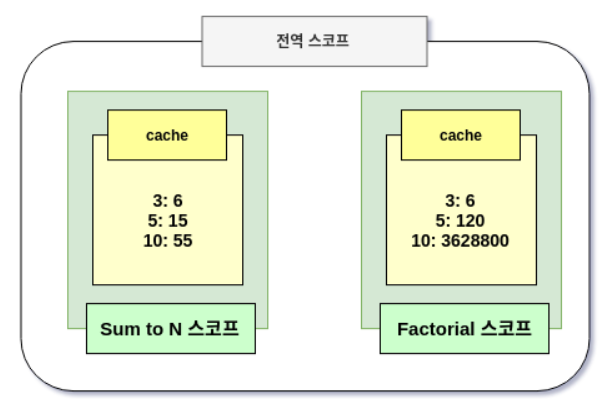

In [322]:
@in_cache
def sum_to_N(N):
    s = 0
    for n in range(N+1):
        s += n
    return s


sum_to_N(5)
sum_to_N(2)

{}


15

{5: 15}


3

In [323]:
f'fac(10): {factorial(10)}'
f'sum(10): {sum_to_N(10)}'

{5: 120, 3: 6, 15: 1307674368000, 0: 1}


'fac(10): 3628800'

{5: 15, 2: 3}


'sum(10): 55'

### __ closure __, cell_contents
Enclosing하고 있는 변수에 접근하는 것을 지원한다. 이 변수는 튜플 타입으로서 클로저가 enclosing 스코프에서 참조하는 변수들을 담고 있다. 그리고 각 원소의 cell_contents 는 그 값 자체를 갖고 있다.

In [324]:
factorial.__closure__
factorial.__closure__[0].cell_contents
factorial.__closure__[1].cell_contents(7)

(<cell at 0x0000012D08A35490: dict object at 0x0000012D08190980>,
 <cell at 0x0000012D08A353D0: function object at 0x0000012D087B45E0>)

{5: 120, 3: 6, 15: 1307674368000, 0: 1, 10: 3628800}

5040

# Conclusion

- DP를 능가하지는 않지만 사고 측면에서 훨씬 쉽다.
- 특히 DP를 적용할 수 있는 경우 성능 측면에서 일부 문제에 대해 Closure가 최상의 솔루션이 아닐 수 있다. 그러나 생각하기가 훨씬 쉬움.
- Closure는 우리가 만족시킬 클래스를 정의하고자 하는 일부 사용 사례를 대체하는 데에도 사용할 수 있다. 이 경우 훨씬 깔끔하고 우아하다.

## Ref
https://shoark7.github.io/programming/python/closure-in-python